In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import ast
from langdetect import detect, LangDetectException

In [2]:
df = pd.read_csv("games.csv")

In [3]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
df.describe()

,Unnamed: 0,Rating
count,1512.000000,1499.000000
mean,755.500000,3.719346
std,436.621117,0.532608
min,0.000000,0.700000
25%,377.750000,3.400000
50%,755.500000,3.800000
75%,1133.250000,4.100000
max,1511.000000,4.800000


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
parse_thousand_to_int = (
    lambda x: int(1000 * float(x.split("K")[0])) if "K" in x else int(x)
)
convert_columns = [
    "Times Listed",
    "Number of Reviews",
    "Plays",
    "Playing",
    "Backlogs",
    "Wishlist",
]
for col in convert_columns:
    df[col] = df[col].apply(parse_thousand_to_int)

In [7]:
df = df[df["Release Date"] != "releases on TBD"]
df.dropna(inplace=True)
df.drop_duplicates(subset="Title", keep="first", inplace=True)

In [8]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["year"] = df["Release Date"].dt.year
df["month"] = df["Release Date"].dt.month
df["score"] = df["Rating"] * df["Number of Reviews"]

In [9]:
df["Reviews"] = df["Reviews"].apply(ast.literal_eval)
for i in range(len(df["Reviews"])):
    for y in df["Reviews"].iloc[i]:
        try:
            if detect(y) != "en":
                df["Reviews"].iloc[i].remove(y)
        except LangDetectException:
            df["Reviews"].iloc[i].remove(y)
df["Reviews"] = df["Reviews"].apply(lambda x: str(x))

In [10]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,year,month,score
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022,2,17550.0
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019,12,12470.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,2017,3,18920.0
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800,2015,9,14700.0
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300,2017,2,13200.0


In [11]:
df.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,year,month,score
count,1083,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,2012-03-09 21:39:03.490304768,3.653924,612.839335,612.839335,5046.650046,189.393352,1180.357341,605.878116,2011.623269,7.264081,2358.369714
min,1980-05-22 00:00:00,0.700000,8.000000,8.000000,8.000000,0.000000,5.000000,2.000000,1980.000000,1.000000,24.000000
25%,2006-10-27 12:00:00,3.400000,238.000000,238.000000,1600.000000,34.000000,389.000000,178.500000,2006.000000,4.000000,810.150000
50%,2013-10-18 00:00:00,3.700000,446.000000,446.000000,3400.000000,82.000000,775.000000,402.000000,2013.000000,8.000000,1664.000000
75%,2019-03-10 12:00:00,4.000000,783.500000,783.500000,6800.000000,203.500000,1650.000000,762.000000,2019.000000,10.000000,2950.600000
max,2023-03-17 00:00:00,4.600000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,4800.000000,2023.000000,12.000000,18920.000000
std,NaN,0.538182,562.280474,562.280474,4971.715287,323.275974,1135.183216,645.591408,8.547697,3.482525,2403.596768


Number of title releases every year


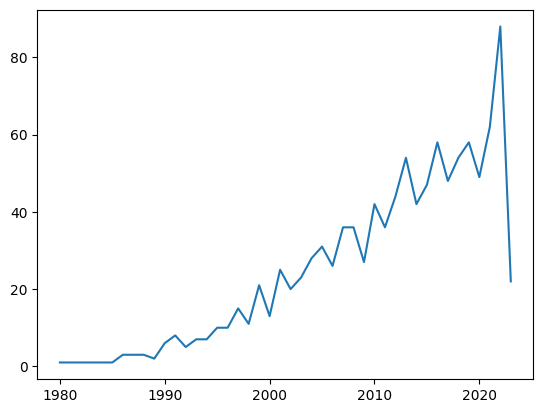

In [12]:
print("Number of title releases every year")
yearly_count = df.groupby("year").count().reset_index()[["year", "Title"]]
plt.plot(yearly_count["year"], yearly_count["Title"])
plt.show()

When during the year do games release?


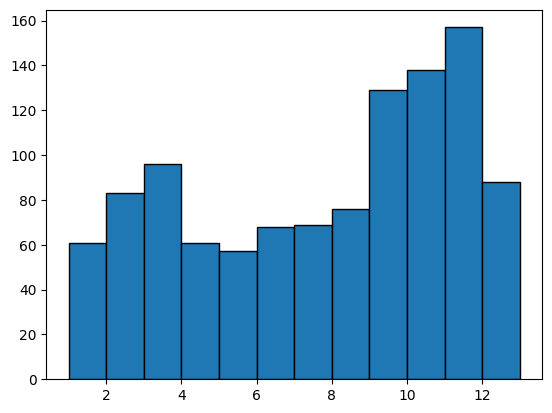

In [19]:
print("When during the year do games release?")
plt.hist(df["month"], bins=range(1, 14), edgecolor="k")
plt.xticks(
    ticks=[x for x in range(1, 13)],
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.show()

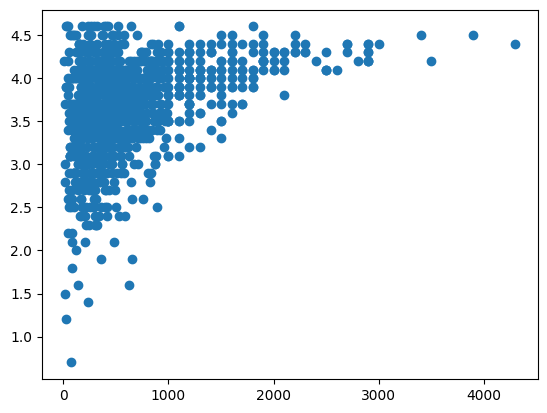

In [14]:
plt.scatter(df["Times Listed"], df["Rating"])
plt.show()

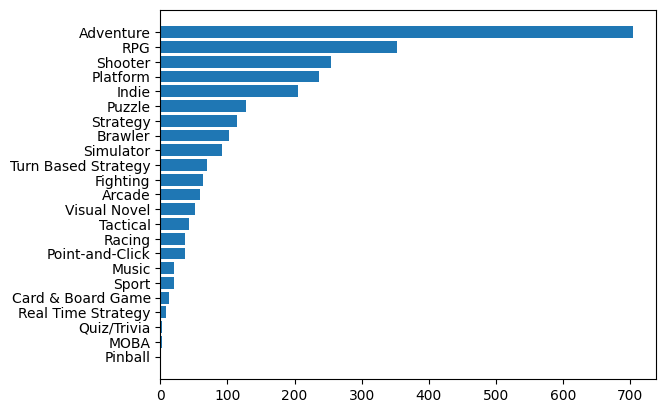

In [15]:
df["Genres"] = df["Genres"].apply(ast.literal_eval)
genres = (
    df.explode("Genres")
    .groupby("Genres")
    .count()
    .reset_index()[["Genres", "Title"]]
    .sort_values(by="Title")
)
plt.barh(genres["Genres"], genres["Title"])
plt.show()

In [16]:
def wordcloud_gen(n):
    df_tmp = df.sort_values(by="score", ascending=False)[:n]
    wordcloud_str = " ".join(df_tmp[df_tmp["Reviews"] != "nan"]["Reviews"])
    custom_stopwords = ["really", "n", "one", "good", "game", "games", "still"]

    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    wordcloud = WordCloud(
        stopwords=stopwords, background_color="white", width=1200, height=900
    ).generate(wordcloud_str)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

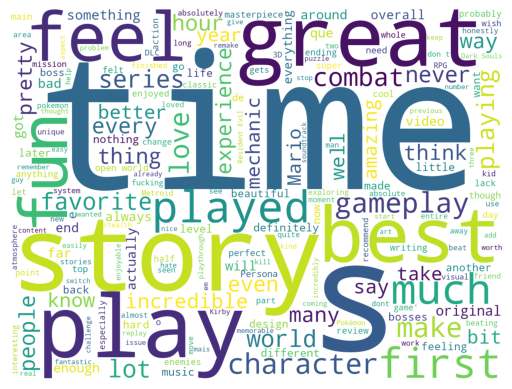

In [17]:
wordcloud_gen(100)